In [345]:
from sklearn import tree
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Preprocessing

In [346]:
data = pd.read_csv('D:/Carlson coursework/Sem 2/Predictive/Assignment 1/wdbc.data.txt', header=None)

In [347]:
raw_data = pd.read_csv('D:/Carlson coursework/Sem 2/Predictive/Assignment 1/wdbc.data.txt', header=None)

In [348]:
data.columns = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension', 'SE_radius', 'SE_texture', 'SE_perimeter', 'SE_area', 'SE_smoothness', 'SE_compactness', 'SE_concavity', 'SE_concave points', 'SE_symmetry', 'SE_fractal dimension', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave points', 'worst_symmetry', 'worst_fractal dimension']

In [349]:
raw_data.columns = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension', 'SE_radius', 'SE_texture', 'SE_perimeter', 'SE_area', 'SE_smoothness', 'SE_compactness', 'SE_concavity', 'SE_concave points', 'SE_symmetry', 'SE_fractal dimension', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave points', 'worst_symmetry', 'worst_fractal dimension']

In [350]:
data

,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [351]:
data.drop('ID', axis=1, inplace=True)

In [352]:
raw_data.drop('ID', axis=1, inplace=True)

In [353]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

In [354]:
raw_data['Diagnosis'] = raw_data['Diagnosis'].map({'M': 1, 'B': 0})

In [355]:
data

,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [356]:
data.describe()

,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


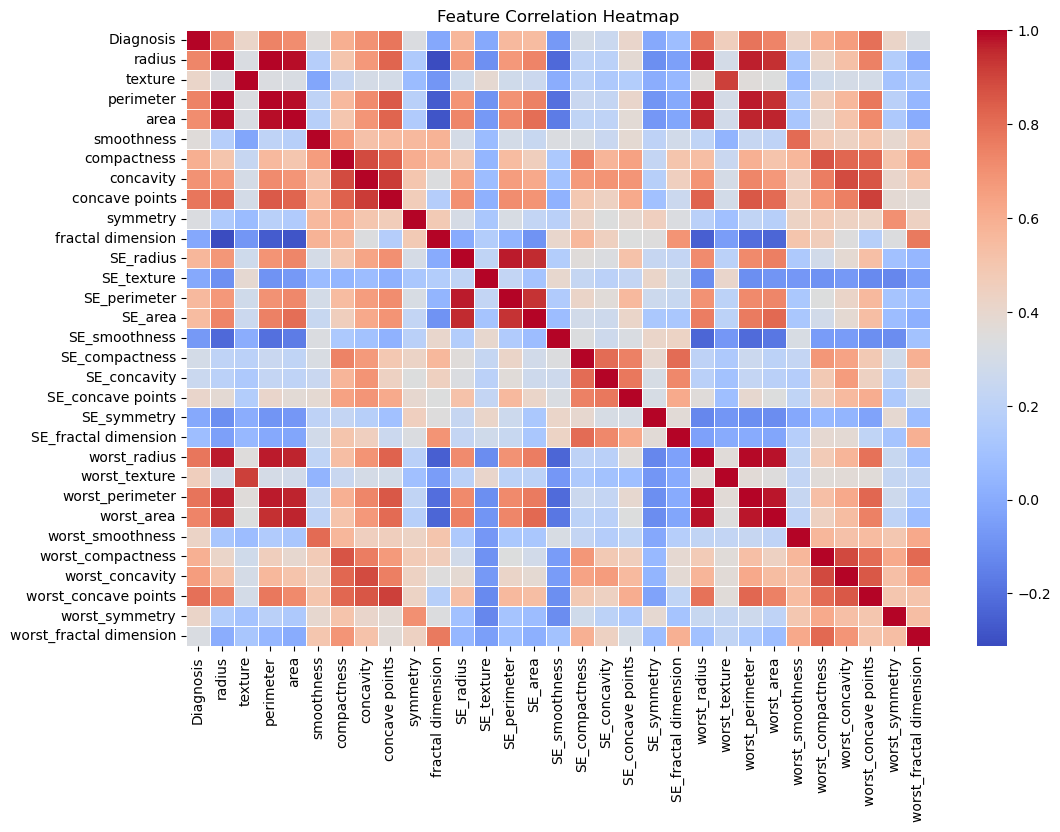

In [357]:
import seaborn as sns

corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

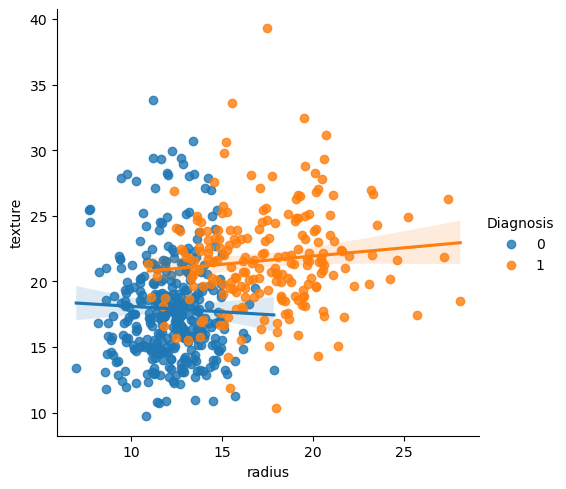

In [358]:
sns.lmplot(x = 'radius', y = 'texture', hue = 'Diagnosis', data = data) 


In [359]:
# Set a correlation threshold (e.g., 0.85)
corr_threshold = 0.8

# Find pairs of features with high correlation
high_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):  # Avoid duplicate pairs
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            high_corr_features.append((corr_matrix.index[i], corr_matrix.index[j], corr_matrix.iloc[i, j]))

# Convert to a DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_features, columns=["Feature 1", "Feature 2", "Correlation"])
print(high_corr_df.sort_values(by="Correlation", ascending=False))


            Feature 1                Feature 2  Correlation
0              radius                perimeter     0.997855
36       worst_radius          worst_perimeter     0.993708
1              radius                     area     0.987357
7           perimeter                     area     0.986507
37       worst_radius               worst_area     0.984015
38    worst_perimeter               worst_area     0.977578
30          SE_radius             SE_perimeter     0.972794
10          perimeter          worst_perimeter     0.970387
3              radius             worst_radius     0.969539
9           perimeter             worst_radius     0.969476
4              radius          worst_perimeter     0.965137
14               area             worst_radius     0.962746
16               area               worst_area     0.959213
15               area          worst_perimeter     0.959120
31          SE_radius                  SE_area     0.951830
11          perimeter               wors

In [360]:
data.drop(['perimeter', 'area', 'worst_perimeter', 'worst_area', 'SE_perimeter', 'SE_area'], axis=1, inplace=True)

In [361]:
corr_matrix = data.corr()
corr_threshold = 0.8

# Find pairs of features with high correlation
high_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):  # Avoid duplicate pairs
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            high_corr_features.append((corr_matrix.index[i], corr_matrix.index[j], corr_matrix.iloc[i, j]))

# Convert to a DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_features, columns=["Feature 1", "Feature 2", "Correlation"])
print(high_corr_df.sort_values(by="Correlation", ascending=False))


            Feature 1                Feature 2  Correlation
1              radius             worst_radius     0.969539
9           concavity           concave points     0.921391
2             texture            worst_texture     0.912045
13     concave points     worst_concave points     0.910155
16  worst_compactness          worst_concavity     0.892261
10          concavity          worst_concavity     0.884103
4         compactness                concavity     0.883121
6         compactness        worst_compactness     0.865809
11          concavity     worst_concave points     0.861323
19    worst_concavity     worst_concave points     0.855434
5         compactness           concave points     0.831135
12     concave points             worst_radius     0.830318
0              radius           concave points     0.822529
7         compactness          worst_concavity     0.816275
8         compactness     worst_concave points     0.815573
18  worst_compactness  worst_fractal dim

In [362]:
data.drop(['worst_radius', 'worst_texture', 'worst_concave points', 'worst_concavity', 'worst_compactness', 'worst_fractal dimension', 'worst_smoothness'], axis=1, inplace=True)

In [363]:
corr_matrix = data.corr()
corr_threshold = 0.8

# Find pairs of features with high correlation
high_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):  # Avoid duplicate pairs
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            high_corr_features.append((corr_matrix.index[i], corr_matrix.index[j], corr_matrix.iloc[i, j]))

# Convert to a DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_features, columns=["Feature 1", "Feature 2", "Correlation"])
print(high_corr_df.sort_values(by="Correlation", ascending=False))

        Feature 1             Feature 2  Correlation
3       concavity        concave points     0.921391
1     compactness             concavity     0.883121
2     compactness        concave points     0.831135
0          radius        concave points     0.822529
5  SE_compactness  SE_fractal dimension     0.803269
4  SE_compactness          SE_concavity     0.801268


In [364]:
data.drop(['concave points'], axis=1, inplace=True)

In [365]:
corr_matrix = data.corr()
corr_threshold = 0.8

# Find pairs of features with high correlation
high_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):  # Avoid duplicate pairs
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            high_corr_features.append((corr_matrix.index[i], corr_matrix.index[j], corr_matrix.iloc[i, j]))

# Convert to a DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_features, columns=["Feature 1", "Feature 2", "Correlation"])
print(high_corr_df.sort_values(by="Correlation", ascending=False))

        Feature 1             Feature 2  Correlation
0     compactness             concavity     0.883121
2  SE_compactness  SE_fractal dimension     0.803269
1  SE_compactness          SE_concavity     0.801268


In [366]:
data.drop(['compactness', 'SE_compactness'], axis=1, inplace=True)

In [367]:
def find_outliers_iqr(df):
    outliers = {}
    for col in df.columns[1:]:  # Skip 'Diagnosis' column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    return outliers

# Get outlier counts
outlier_counts = find_outliers_iqr(data)

# Convert to DataFrame for easy viewing
outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier_Count'])
print(outlier_df.sort_values(by='Outlier_Count', ascending=False))


                 Feature  Outlier_Count
6              SE_radius             38
8          SE_smoothness             30
12  SE_fractal dimension             28
11           SE_symmetry             27
13        worst_symmetry             23
9           SE_concavity             22
7             SE_texture             20
10     SE_concave points             19
3              concavity             18
4               symmetry             15
5      fractal dimension             15
0                 radius             14
1                texture              7
2             smoothness              6


In [368]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:, 1:].values, data['Diagnosis'].values, 
    test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Apply scaling
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [369]:
scaler = MinMaxScaler()

X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(
    raw_data.iloc[:, 1:].values, raw_data['Diagnosis'].values, 
    test_size=0.2, random_state=42
)

X_raw_train, X_raw_val, y_raw_train, y_raw_val = train_test_split(X_raw_train, y_raw_train, test_size=0.25, random_state=42)

# Apply_raw scaling
X_raw_train_scaled = scaler.fit_transform(X_raw_train)
X_raw_val_scaled = scaler.transform(X_raw_val)
X_raw_test_scaled = scaler.transform(X_raw_test)

#### Decision tree

Depth=1, Train Accuracy Error=0.076, Val Accuracy Error=0.088, Recall=0.886
Depth=2, Train Accuracy Error=0.032, Val Accuracy Error=0.079, Recall=0.932
Depth=3, Train Accuracy Error=0.021, Val Accuracy Error=0.070, Recall=0.932
Depth=4, Train Accuracy Error=0.015, Val Accuracy Error=0.070, Recall=0.932
Depth=5, Train Accuracy Error=0.006, Val Accuracy Error=0.070, Recall=0.932
Depth=6, Train Accuracy Error=0.000, Val Accuracy Error=0.070, Recall=0.955
Depth=7, Train Accuracy Error=0.000, Val Accuracy Error=0.070, Recall=0.955
Depth=8, Train Accuracy Error=0.000, Val Accuracy Error=0.070, Recall=0.955
Depth=9, Train Accuracy Error=0.000, Val Accuracy Error=0.070, Recall=0.955
Depth=10, Train Accuracy Error=0.000, Val Accuracy Error=0.070, Recall=0.955
Depth=11, Train Accuracy Error=0.000, Val Accuracy Error=0.070, Recall=0.955


Depth=12, Train Accuracy Error=0.000, Val Accuracy Error=0.070, Recall=0.955
Depth=13, Train Accuracy Error=0.000, Val Accuracy Error=0.070, Recall=0.955
Depth=14, Train Accuracy Error=0.000, Val Accuracy Error=0.070, Recall=0.955
Depth=15, Train Accuracy Error=0.000, Val Accuracy Error=0.070, Recall=0.955
Depth=16, Train Accuracy Error=0.000, Val Accuracy Error=0.070, Recall=0.955
Depth=17, Train Accuracy Error=0.000, Val Accuracy Error=0.070, Recall=0.955
Depth=18, Train Accuracy Error=0.000, Val Accuracy Error=0.070, Recall=0.955
Depth=19, Train Accuracy Error=0.000, Val Accuracy Error=0.070, Recall=0.955


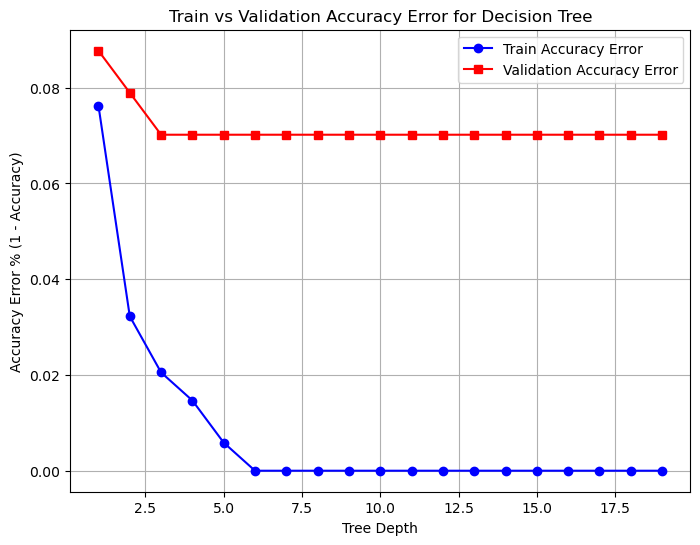

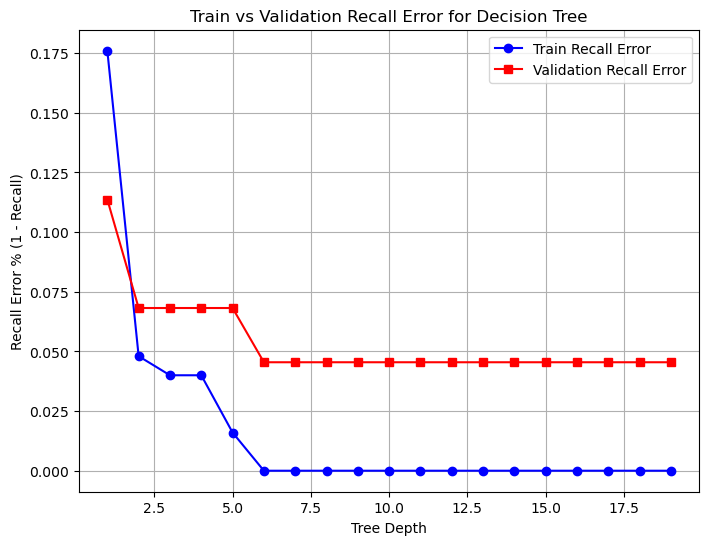

In [370]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

depth_values = range(1, 20)

train_accuracy_errors = []  
val_accuracy_errors = []  
train_recall_errors = []  
val_recall_errors = []

for depth in depth_values:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_raw_train, y_raw_train)
    y_raw_train_pred = clf.predict(X_raw_train)
    y_val_pred = clf.predict(X_raw_val)

    train_accuracy_error = 1 - accuracy_score(y_raw_train, y_raw_train_pred)
    val_accuracy_error = 1 - accuracy_score(y_raw_val, y_val_pred)
    
    train_accuracy_errors.append(train_accuracy_error)
    val_accuracy_errors.append(val_accuracy_error)

    report_train = classification_report(y_raw_train, y_raw_train_pred, target_names=["Benign", "Malignant"], output_dict=True)
    recall_malignant_train = report_train["Malignant"]["recall"]

    report_val = classification_report(y_raw_val, y_val_pred, target_names=["Benign", "Malignant"], output_dict=True)
    recall_malignant_val = report_val["Malignant"]["recall"]

    train_recall_error = 1 - recall_malignant_train
    val_recall_error = 1 - recall_malignant_val
    
    train_recall_errors.append(train_recall_error)
    val_recall_errors.append(val_recall_error)

    print(f"Depth={depth}, Train Accuracy Error={train_accuracy_error:.3f}, Val Accuracy Error={val_accuracy_error:.3f}, Recall={recall_malignant_val:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(depth_values, train_accuracy_errors, marker='o', linestyle='-', color='b', label="Train Accuracy Error")
plt.plot(depth_values, val_accuracy_errors, marker='s', linestyle='-', color='r', label="Validation Accuracy Error")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy Error % (1 - Accuracy)")
plt.title("Train vs Validation Accuracy Error for Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(depth_values, train_recall_errors, marker='o', linestyle='-', color='b', label="Train Recall Error")
plt.plot(depth_values, val_recall_errors, marker='s', linestyle='-', color='r', label="Validation Recall Error")
plt.xlabel("Tree Depth")
plt.ylabel("Recall Error % (1 - Recall)")
plt.title("Train vs Validation Recall Error for Decision Tree")
plt.legend()
plt.grid(True)
plt.show()


In [371]:
from sklearn.metrics import classification_report, confusion_matrix

min_samples_splits = [2, 5, 10, 20, 50]
min_samples_leaves = [1, 5, 10, 20, 50]

results = {}

for min_split in min_samples_splits:
    for min_leaf in min_samples_leaves:
        clf = DecisionTreeClassifier(max_depth=3, min_samples_split=min_split, min_samples_leaf=min_leaf, random_state=42)
        clf.fit(X_raw_train, y_raw_train)

        y_train_pred = clf.predict(X_raw_train)
        y_val_pred = clf.predict(X_raw_val)

        report_train = classification_report(y_raw_train, y_train_pred, target_names=["Benign", "Malignant"], output_dict=True)
        recall_malignant_train = report_train["Malignant"]["recall"]

        report_val = classification_report(y_raw_val, y_val_pred, target_names=["Benign", "Malignant"], output_dict=True)
        recall_malignant_val = report_val["Malignant"]["recall"]

        train_recall_error = 1 - recall_malignant_train
        val_recall_error = 1 - recall_malignant_val

        results[(min_split, min_leaf)] = (train_recall_error, val_recall_error)

        print(f"Min Split={min_split}, Min Leaf={min_leaf}, Train Recall={recall_malignant_train:.3f}, Val Recall={recall_malignant_val:.3f}")

Min Split=2, Min Leaf=1, Train Recall=0.960, Val Recall=0.932
Min Split=2, Min Leaf=5, Train Recall=0.920, Val Recall=0.909
Min Split=2, Min Leaf=10, Train Recall=0.952, Val Recall=0.932
Min Split=2, Min Leaf=20, Train Recall=0.968, Val Recall=0.955
Min Split=2, Min Leaf=50, Train Recall=0.824, Val Recall=0.886
Min Split=5, Min Leaf=1, Train Recall=0.960, Val Recall=0.932
Min Split=5, Min Leaf=5, Train Recall=0.920, Val Recall=0.909
Min Split=5, Min Leaf=10, Train Recall=0.952, Val Recall=0.932
Min Split=5, Min Leaf=20, Train Recall=0.968, Val Recall=0.955
Min Split=5, Min Leaf=50, Train Recall=0.824, Val Recall=0.886
Min Split=10, Min Leaf=1, Train Recall=0.960, Val Recall=0.932
Min Split=10, Min Leaf=5, Train Recall=0.920, Val Recall=0.909
Min Split=10, Min Leaf=10, Train Recall=0.952, Val Recall=0.932
Min Split=10, Min Leaf=20, Train Recall=0.968, Val Recall=0.955
Min Split=10, Min Leaf=50, Train Recall=0.824, Val Recall=0.886
Min Split=20, Min Leaf=1, Train Recall=0.960, Val Recall

In [372]:
final_clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=20,random_state=42)
final_clf.fit(X_raw_train, y_raw_train)

y_raw_test_pred = final_clf.predict(X_raw_test)
print("\n **Final Model Performance on Test Set**")
print(classification_report(y_raw_test, y_raw_test_pred, target_names=["Benign", "Malignant"]))

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\n Confusion Matrix:")
print(conf_matrix)



 **Final Model Performance on Test Set**
              precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        71
   Malignant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


 Confusion Matrix:
[[69  2]
 [ 1 42]]


#### K-nearest neighbors
Using data without correlated columns to remove bias

Metric: euclidean, k: 1, Train Recall: 1.000, Validation Recall: 0.818
Metric: euclidean, k: 3, Train Recall: 0.824, Validation Recall: 0.773
Metric: euclidean, k: 5, Train Recall: 0.816, Validation Recall: 0.773
Metric: euclidean, k: 7, Train Recall: 0.824, Validation Recall: 0.773
Metric: euclidean, k: 9, Train Recall: 0.808, Validation Recall: 0.818
Metric: euclidean, k: 11, Train Recall: 0.816, Validation Recall: 0.818
Metric: euclidean, k: 13, Train Recall: 0.808, Validation Recall: 0.864
Metric: euclidean, k: 15, Train Recall: 0.808, Validation Recall: 0.886
Metric: euclidean, k: 17, Train Recall: 0.816, Validation Recall: 0.864
Metric: euclidean, k: 19, Train Recall: 0.816, Validation Recall: 0.864
Metric: euclidean, k: 21, Train Recall: 0.800, Validation Recall: 0.886
Metric: euclidean, k: 23, Train Recall: 0.800, Validation Recall: 0.886
Metric: euclidean, k: 25, Train Recall: 0.800, Validation Recall: 0.886
Metric: euclidean, k: 27, Train Recall: 0.800, Validation Recall: 0.8

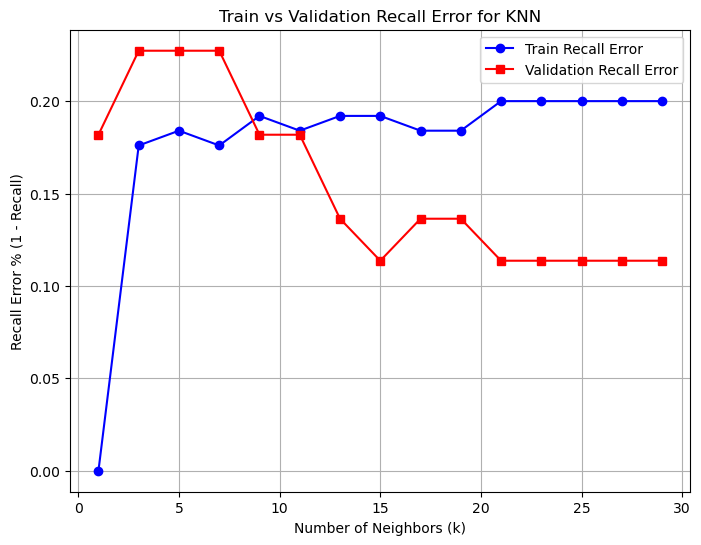

In [373]:
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 31, 2)
metric = 'euclidean'

train_recall_errors = []  
val_recall_errors = [] 

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_val)

    report_train = classification_report(y_train, y_train_pred, target_names=["Benign", "Malignant"], output_dict=True)
    recall_malignant_train = report_train["Malignant"]["recall"]

    report_val = classification_report(y_val, y_val_pred, target_names=["Benign", "Malignant"], output_dict=True)
    recall_malignant_val = report_val["Malignant"]["recall"]

    train_recall_error = 1 - recall_malignant_train
    val_recall_error = 1 - recall_malignant_val

    train_recall_errors.append(train_recall_error)
    val_recall_errors.append(val_recall_error)

    print(f"Metric: {metric}, k: {k}, Train Recall: {recall_malignant_train:.3f}, Validation Recall: {recall_malignant_val:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(k_values, train_recall_errors, marker='o', linestyle='-', color='b', label="Train Recall Error")
plt.plot(k_values, val_recall_errors, marker='s', linestyle='-', color='r', label="Validation Recall Error")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Recall Error % (1 - Recall)")
plt.title("Train vs Validation Recall Error for KNN")
plt.legend()
plt.grid(True)
plt.show()


In [374]:

final_knn = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
final_knn.fit(X_train, y_train)

y_test_pred = final_knn.predict(X_test)
print(" **Final Model Performance on Test Set**")
print(classification_report(y_test, y_test_pred, target_names=["Benign", "Malignant"]))

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\n Confusion Matrix:")
print(conf_matrix)

 **Final Model Performance on Test Set**
              precision    recall  f1-score   support

      Benign       0.93      0.93      0.93        71
   Malignant       0.88      0.88      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114


 Confusion Matrix:
[[66  5]
 [ 5 38]]


#### Logistic regression


 C=100.00
L1 (Lasso) Regularization: Train Recall=0.952, Val Recall=0.955
L2 (Ridge) Regularization: Train Recall=0.832, Val Recall=0.909

 C=10.00
L1 (Lasso) Regularization: Train Recall=0.952, Val Recall=0.932
L2 (Ridge) Regularization: Train Recall=0.896, Val Recall=0.932

 C=1.00
L1 (Lasso) Regularization: Train Recall=0.856, Val Recall=0.909
L2 (Ridge) Regularization: Train Recall=0.808, Val Recall=0.909

 C=0.10
L1 (Lasso) Regularization: Train Recall=0.672, Val Recall=0.659
L2 (Ridge) Regularization: Train Recall=0.800, Val Recall=0.909


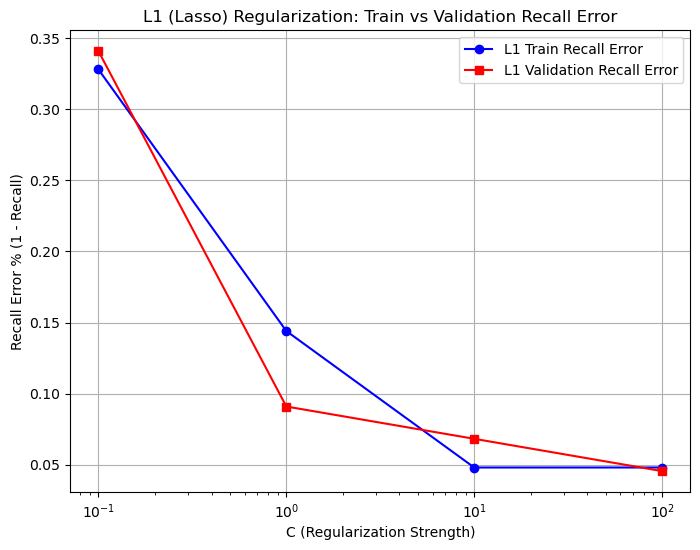

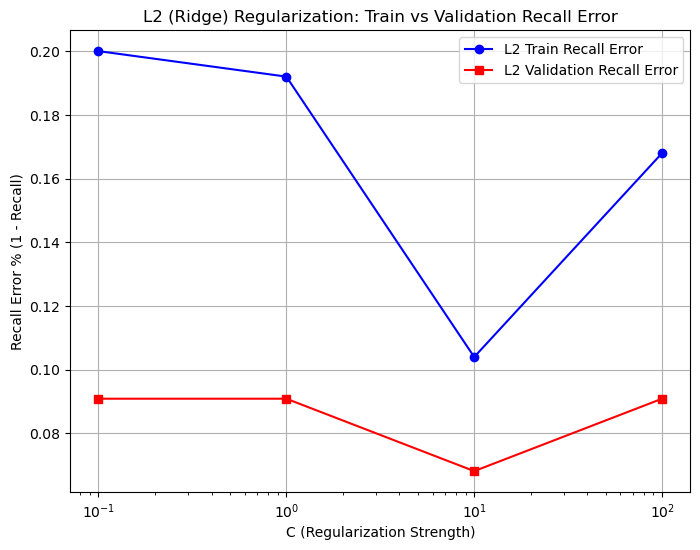

In [375]:
l1_train_recall_errors = []
l1_val_recall_errors = []
l2_train_recall_errors = []
l2_val_recall_errors = []

for i, C in enumerate((100, 10, 1, 0.1)):
    clf_l1 = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='liblinear')
    clf_l2 = LogisticRegression(C=C, penalty='l2', tol=0.01, solver='lbfgs', max_iter=1000)

    clf_l1.fit(X_train, y_train)
    clf_l2.fit(X_train, y_train)

    y_train_pred_l1 = clf_l1.predict(X_train)
    y_val_pred_l1 = clf_l1.predict(X_val)

    y_train_pred_l2 = clf_l2.predict(X_train)
    y_val_pred_l2 = clf_l2.predict(X_val)

    report_train_l1 = classification_report(y_train, y_train_pred_l1, target_names=["Benign", "Malignant"], output_dict=True)
    report_val_l1 = classification_report(y_val, y_val_pred_l1, target_names=["Benign", "Malignant"], output_dict=True)

    report_train_l2 = classification_report(y_train, y_train_pred_l2, target_names=["Benign", "Malignant"], output_dict=True)
    report_val_l2 = classification_report(y_val, y_val_pred_l2, target_names=["Benign", "Malignant"], output_dict=True)

    recall_train_l1 = report_train_l1["Malignant"]["recall"]
    recall_val_l1 = report_val_l1["Malignant"]["recall"]

    recall_train_l2 = report_train_l2["Malignant"]["recall"]
    recall_val_l2 = report_val_l2["Malignant"]["recall"]

    recall_error_train_l1 = 1 - recall_train_l1
    recall_error_val_l1 = 1 - recall_val_l1

    recall_error_train_l2 = 1 - recall_train_l2
    recall_error_val_l2 = 1 - recall_val_l2

    l1_train_recall_errors.append(recall_error_train_l1)
    l1_val_recall_errors.append(recall_error_val_l1)

    l2_train_recall_errors.append(recall_error_train_l2)
    l2_val_recall_errors.append(recall_error_val_l2)

    print(f"\n C={C:.2f}")
    print(f"L1 (Lasso) Regularization: Train Recall={recall_train_l1:.3f}, Val Recall={recall_val_l1:.3f}")
    print(f"L2 (Ridge) Regularization: Train Recall={recall_train_l2:.3f}, Val Recall={recall_val_l2:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(C_values, l1_train_recall_errors, marker='o', linestyle='-', color='b', label="L1 Train Recall Error")
plt.plot(C_values, l1_val_recall_errors, marker='s', linestyle='-', color='r', label="L1 Validation Recall Error")
plt.xlabel("C (Regularization Strength)")
plt.ylabel("Recall Error % (1 - Recall)")
plt.xscale('log')
plt.title("L1 (Lasso) Regularization: Train vs Validation Recall Error")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(C_values, l2_train_recall_errors, marker='o', linestyle='-', color='b', label="L2 Train Recall Error")
plt.plot(C_values, l2_val_recall_errors, marker='s', linestyle='-', color='r', label="L2 Validation Recall Error")
plt.xlabel("C (Regularization Strength)")
plt.ylabel("Recall Error % (1 - Recall)")
plt.xscale('log')
plt.title("L2 (Ridge) Regularization: Train vs Validation Recall Error")
plt.legend()
plt.grid(True)
plt.show()


In [376]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

best_model = linear_model.LogisticRegression(C=100, penalty='l1', tol=0.01, solver='liblinear')

best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)

print("\n **Final Model Performance on Test Set**")
print(classification_report(y_test, y_test_pred, target_names=["Benign", "Malignant"]))

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\n Confusion Matrix:")
print(conf_matrix)


 **Final Model Performance on Test Set**
              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97        71
   Malignant       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114


 Confusion Matrix:
[[68  3]
 [ 1 42]]
